### 결정 트리(Decisiontree) - 분류
- 스무고개 처럼 질문/결정을 통해 데이터를 분류하는 모델
    - 데이터 스케일링 영향이 적음
    - 선형 구조가 아닌 복잡한 구조의 데이터에 적합
    - 과대 적합 되기 쉬움 -> 가지치기 등을 통해 과대적합 방지

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### graphviz 설치
- 그래프 시각화를 위한 오픈소스 소프트웨어 도구
1. os에 설치
2. python wrapper package 설치
3. plot_tree 사용

In [46]:
# !pip install graphviz

### wine 이진 분류
- 와인 품질 데이터셋을 가공한 레드/화이트 와인 이진분류 데이터셋
    - 0. 레드 와인
    - 1. 화이트 와인

In [47]:
# 데이터 로드
wine_df = pd.read_csv('./data/wine_simple.csv')
wine_df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [48]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분리 및 스케일링
X = wine_df.drop('class', axis=1)
y = wine_df['class']
y.value_counts()

X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)
print(X_train.shape, X_test.shape)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)


(4872, 3) (1625, 3)


In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3) # max_depth : 가지치기(최대깊이 지정)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.8433908045977011, 0.8584615384615385)

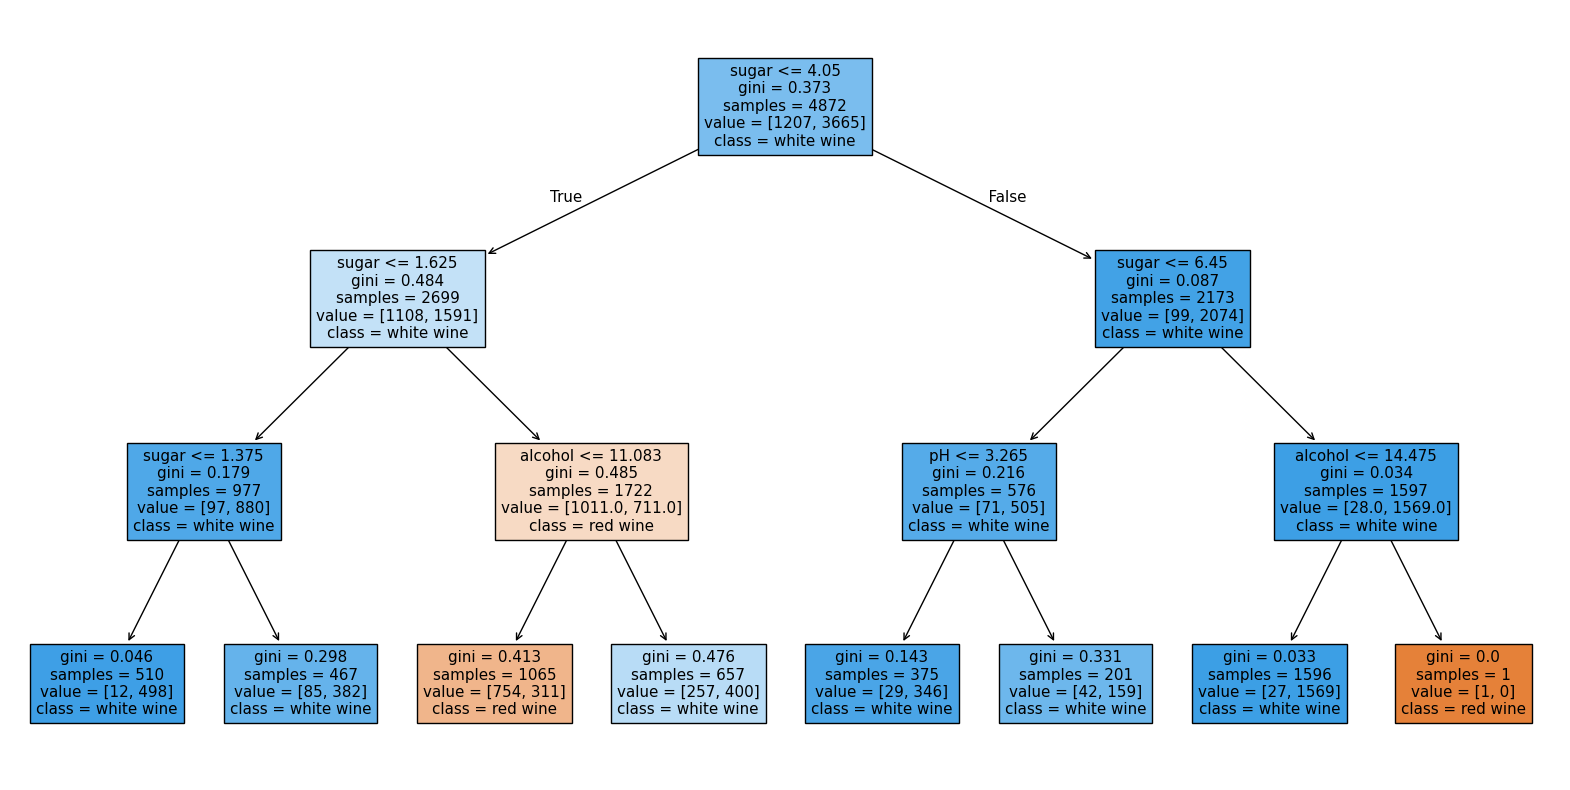

In [50]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=X.columns,
    class_names=['red wine', 'white wine'],
    )
plt.savefig('./images/wind_simple.png')
plt.show()

In [51]:
1 - ((1205/4872) ** 2 + (3665/4872) ** 2)

0.3729352373133161

In [52]:
dt_clf.feature_importances_

array([0.11483515, 0.87892904, 0.00623581])

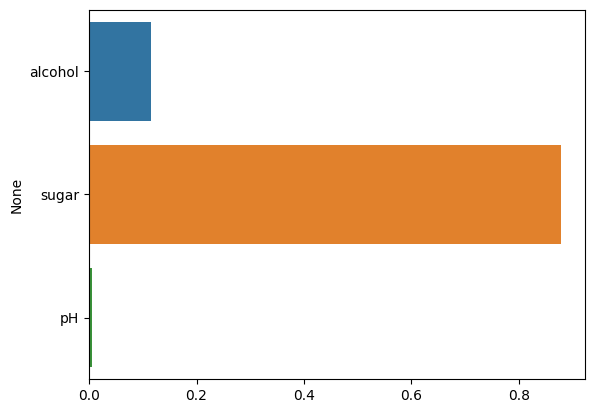

In [53]:
# 특성 중요도 시각화각화
sns.barplot(x=dt_clf.feature_importances_, y=X.columns, hue=X.columns)
plt.show()

### iris 다중분류

In [61]:

# 데이터 로드 및 분리
from sklearn.datasets import load_iris

iris_data = load_iris() # data: x데이터, target : y 데이터
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,random_state=0)

In [62]:
# 모델 학습 및 평가
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_clf.fit(X_train,y_train)

dt_clf.score(X_train,y_train), dt_clf.score(X_test, y_test)

(0.9821428571428571, 0.9736842105263158)

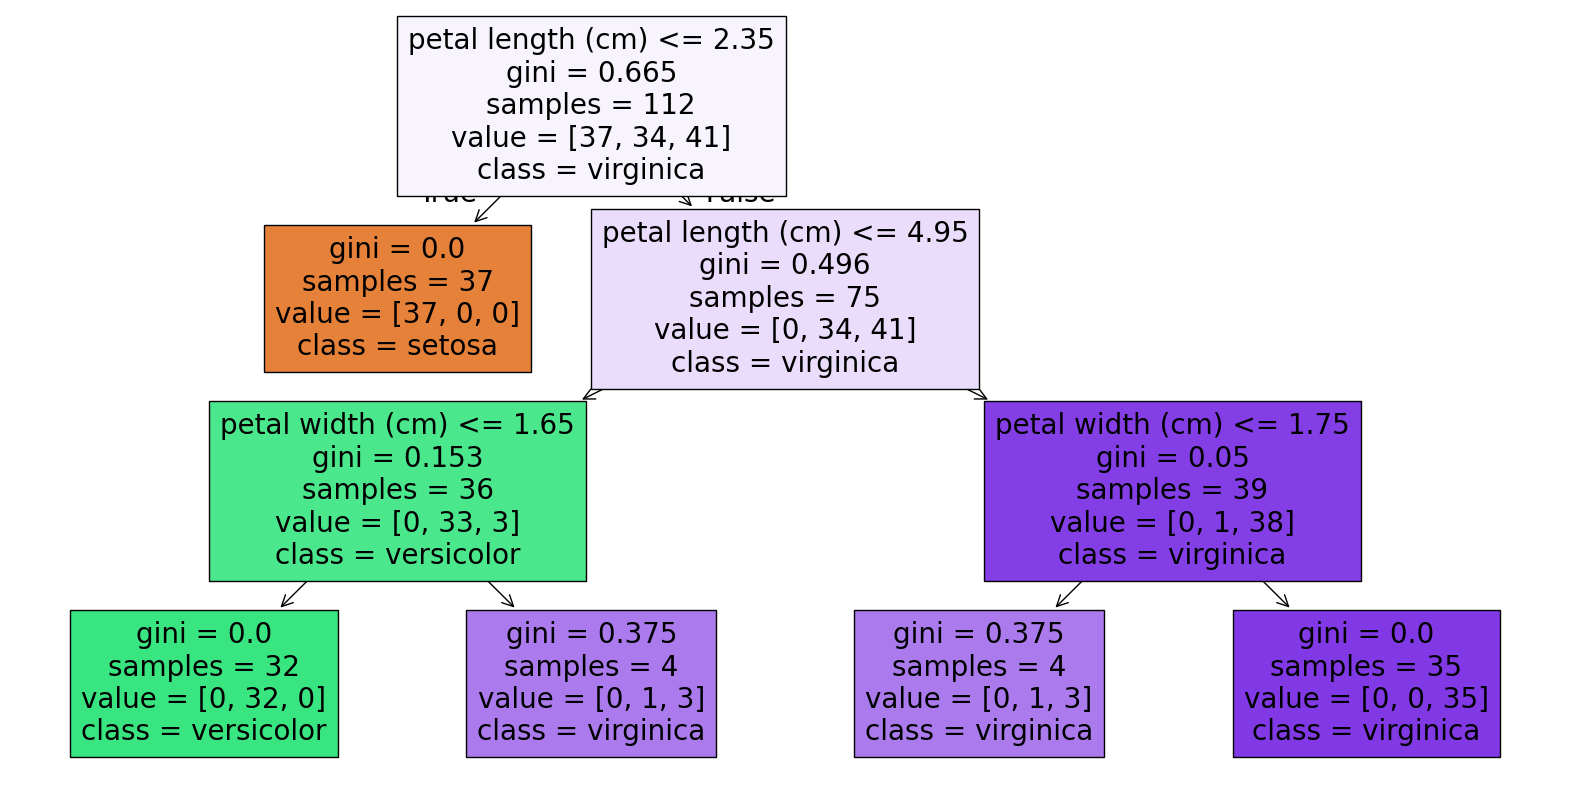

In [64]:
# 트림모델 시각화
plt.figure(figsize=(20,10))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names
)

plt.show()

